#Implementation of Supervised and Unsupervised Learning Algorithms

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load and View Dataset

In [ ]:
df = pd.read_csv("USA_Housing.csv")
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
df.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#Supervised Learning


1. Select Features & Target

In [ ]:
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']


2. Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


3. Train Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

4. Predictions

In [ ]:
predictions = model.predict(X_test)


5. Evaluate Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)


MAE: 80879.0972348982
MSE: 10089009300.894518
RMSE: 100444.06055558745


6. Visualize Clusters

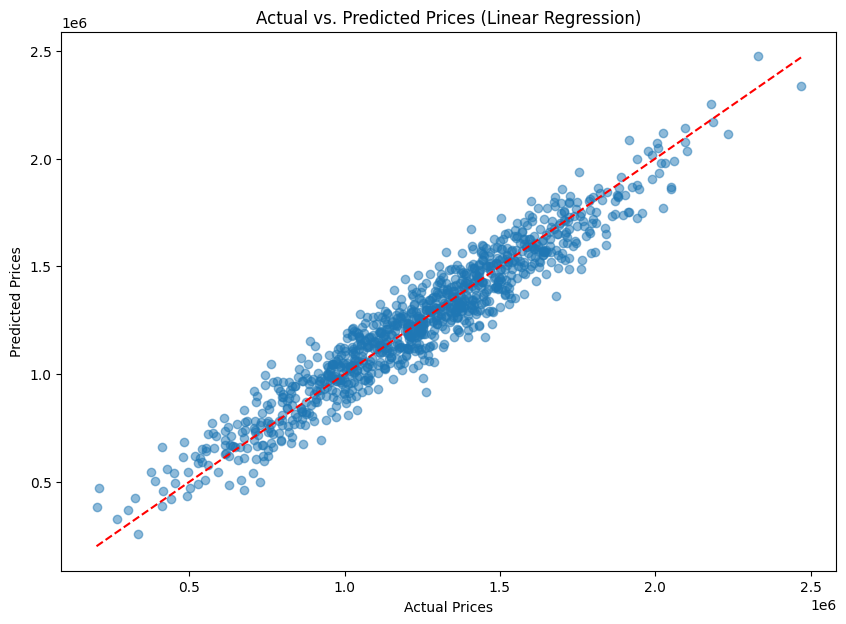

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Plotting the ideal line
plt.show()

#Unsupervised Learning

1. Select Numeric Features

In [ ]:
X_cluster = df.drop(['Price', 'Address'], axis=1)


2. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


3. Apply K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


4. Add Cluster Labels

In [ ]:
df['Cluster'] = clusters
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Cluster
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",2
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,2


5. Visualize Clusters

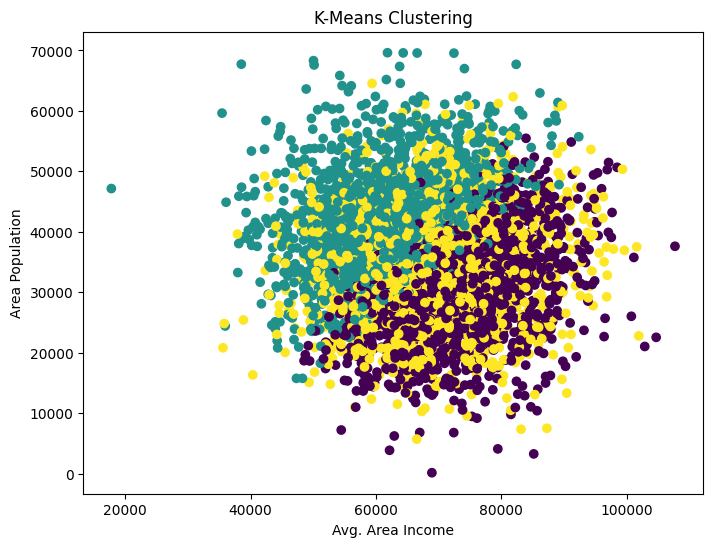

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Avg. Area Income'], df['Area Population'], c=df['Cluster'])
plt.xlabel("Avg. Area Income")
plt.ylabel("Area Population")
plt.title("K-Means Clustering")
plt.show()


## Comparison of Supervised and Unsupervised Learning

In this notebook, we've implemented both **Supervised Learning** (using Linear Regression for house price prediction) and **Unsupervised Learning** (using K-Means for customer clustering).

Here's a comparison of these two fundamental machine learning paradigms:

### 1. Supervised Learning

*   **Definition**: Supervised learning algorithms learn from labeled data, meaning the input data ($X$) is paired with the correct output ($y$). The goal is to learn a mapping function from the input to the output.
*   **Objective**: To predict an outcome (regression or classification) based on historical data. Our Linear Regression model predicted `Price` based on other features.
*   **Data Requirements**: Requires a dataset where the 'correct answer' or target variable is known for each input. (e.g., `Price` in our house dataset).
*   **Algorithms Used**: Linear Regression, Logistic Regression, Support Vector Machines (SVMs), Decision Trees, Random Forests, Neural Networks.
*   **Advantages**:
    *   Can make highly accurate predictions on new, unseen data.
    *   Clear evaluation metrics (e.g., MAE, MSE, RMSE as calculated for our Linear Regression model).
*   **Disadvantages**:
    *   Requires large amounts of labeled data, which can be expensive and time-consuming to obtain.
    *   Performance heavily depends on the quality and completeness of the labels.

### 2. Unsupervised Learning

*   **Definition**: Unsupervised learning algorithms work with unlabeled data. The goal is to discover hidden patterns, structures, or relationships within the data without any explicit guidance.
*   **Objective**: To explore the intrinsic structure of data. Our K-Means model identified `Clusters` within the housing data based on features like 'Avg. Area Income' and 'Area Population'.
*   **Data Requirements**: Does not require a labeled target variable; it works solely with input features. (e.g., we used features like 'Avg. Area Income' and 'Area Population' to form clusters).
*   **Algorithms Used**: K-Means Clustering, Hierarchical Clustering, Principal Component Analysis (PCA), Association Rule Mining.
*   **Advantages**:
    *   Can find hidden patterns in data that might not be obvious to humans.
    *   Useful for exploratory data analysis, dimensionality reduction, and anomaly detection.
    *   Does not require labeled data, making it suitable for situations where labeling is impractical.
*   **Disadvantages**:
    *   Evaluation can be more subjective as there's no 'correct answer' to compare against.
    *   Interpreting the discovered patterns or clusters can be challenging.



#Conclusion

In this experiment, both supervised and unsupervised learning techniques were successfully implemented using Python in Google Colab. Linear Regression demonstrated effective prediction of house prices when labeled data was available, highlighting the strength of supervised learning for regression problems. K-Means clustering, an unsupervised approach, helped uncover hidden patterns and groupings within the housing data without relying on output labels.

The experiment emphasizes the importance of selecting appropriate learning techniques based on problem requirements and data availability. Overall, this practical implementation strengthened understanding of machine learning fundamentals and their real-world applications.